In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [23]:
dfT = pd.read_csv('./data/thyroidDF.csv')
# retirando as colunas que não iremos utilizar para treinar o modelo
dfT.drop(columns=['patient_id', 'on_thyroxine', 'query_on_thyroxine', 'sick', 'I131_treatment',
                 'query_hypothyroid','pregnant','query_hyperthyroid','lithium', 'goitre',
                 'hypopituitary','psych','TSH_measured', 'T3', 'T3_measured','TT4_measured','T4U_measured',
                  'FTI_measured', 'TBG', 'TBG_measured','referral_source'], inplace=True)

In [24]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_antithyroid_meds  9172 non-null   object 
 3   thyroid_surgery      9172 non-null   object 
 4   tumor                9172 non-null   object 
 5   TSH                  8330 non-null   float64
 6   TT4                  8730 non-null   float64
 7   T4U                  8363 non-null   float64
 8   FTI                  8370 non-null   float64
 9   target               9172 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 716.7+ KB


In [25]:
# porcentagem de linhas vazias que sobraram depois de termos retirados algumas colunas

(dfT.isna().sum() / 9172) * 100

age                    0.000000
sex                    3.347143
on_antithyroid_meds    0.000000
thyroid_surgery        0.000000
tumor                  0.000000
TSH                    9.180113
TT4                    4.819014
T4U                    8.820323
FTI                    8.744003
target                 0.000000
dtype: float64

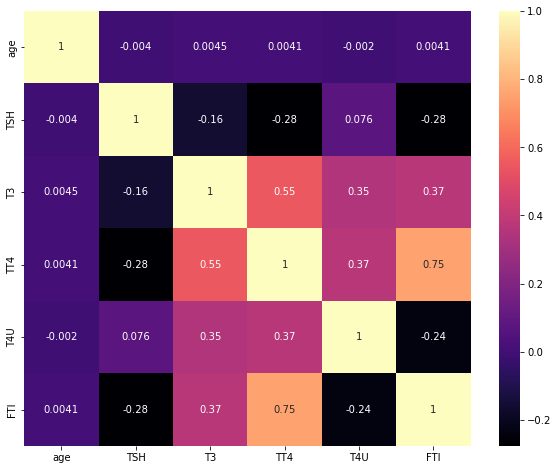

In [3]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dfT.corr(), annot=True, cmap="magma");

In [4]:
dfT.shape, dfT.columns

# indices que são numéricos
# 0 17 19 21 23 25 27

((9172, 11),
 Index(['age', 'sex', 'on_antithyroid_meds', 'thyroid_surgery', 'tumor', 'TSH',
        'T3', 'TT4', 'T4U', 'FTI', 'target'],
       dtype='object'))

In [5]:
dfT.head()

,age,sex,on_antithyroid_meds,thyroid_surgery,tumor,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,0.3,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,1.6,1.9,128.0,NaN,NaN,-
2,41,F,f,f,f,NaN,NaN,NaN,NaN,NaN,-
3,36,F,f,f,f,NaN,NaN,NaN,NaN,NaN,-
4,32,F,f,f,f,NaN,NaN,NaN,NaN,NaN,S


In [6]:
dfT[dfT['target'] == '-'].index

Int64Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,
            ...
            9160, 9161, 9163, 9164, 9165, 9166, 9167, 9168, 9170, 9171],
           dtype='int64', length=6771)

In [8]:
dfT.describe()

,age,TSH,T3,TT4,T4U,FTI
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000


In [9]:
# Esse valor tem os dados desbalanceados devido uma quantidade de NaN presente
# E por termos valores vazios no dataset

dfT.mean()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_14328\2626342529.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfT.mean()


age     73.555822
TSH      5.218403
T3       1.970629
TT4    108.700305
T4U      0.976056
FTI    113.640746
dtype: float64

In [10]:
dfT.isna().sum()

age                       0
sex                     307
on_antithyroid_meds       0
thyroid_surgery           0
tumor                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
target                    0
dtype: int64

In [ ]:
sns.histplot(x=dfT['TBG'], y=dfT['T4U'], kde=True, color='darkblue');

In [ ]:
sns.lmplot(data=dfT,
          x='TBG',
          y='T4U');

In [ ]:
sns.lmplot(data=dfT,
          x='TT4', y='FTI',
           hue='sex');

In [ ]:
sns.lmplot(data=dfT,
          x='TSH', y='T3');

In [ ]:
sns.lmplot(data=dfT,
          x='TSH', y='FTI');

In [ ]:
sns.lmplot(data=dfT,
          x='T3',
          y='TT4');

In [ ]:
sns.scatterplot(data=dfT, x='T4U', y='TT4', hue='sex')

In [ ]:
sns.scatterplot(data=dfT, x='T4U', y='TSH', hue='sex')

In [ ]:
sns.countplot(dfT['age'], palette='mako');
# dfT[dfT['age'] <= 0] >>>> sem idades negativas

In [ ]:
plt.hist(x = dfT['age'], color='lightgreen');

In [ ]:
sns.countplot(dfT['sex'], palette='mako');

In [ ]:
X = dfT.iloc[:, 0:11].values
X

In [ ]:
# precisamos tratar os valores de X, pois estão muito desbalanceados

X[:,0].min(), X[:,0].max()

#### Tratando os valores de X

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
y = dfT.iloc[:, 11].values
y

In [ ]:
# '-' representa 'no condition'
sns.histplot(y, kde=True, color='green');

In [ ]:
# visualizando as pessoas que tem Hipertiroidismo

dfT[dfT['target'] == 'ABCD'].index

# visualizando as pessoas com hipotiroidismo

dfT[dfT['target'] == 'EFGH'].index

# Ambos retornam arrays com valores vazios.

#### Precisamos fazer grupos que dividam a classe 'target' nos subgrupos de diagnóstico
<br />
hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic
    
<br />
hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid


In [ ]:
## Label Enconder para tratamento de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Vamos usar o dfT_X para treinar o modelo
dfT_X = X

In [ ]:
dfT.columns

In [ ]:
dfT_X

In [ ]:
label_enconder_sex = LabelEncoder()
label_enconder_meds = LabelEncoder()
label_enconder_surgery = LabelEncoder()
label_enconder_tumor = LabelEncoder()
label_enconder_target = LabelEncoder()

In [ ]:
dfT_X

In [ ]:
dfT.columns

In [ ]:
dfT_X[:,1] = label_enconder_sex.fit_transform(dfT_X[:,1])
dfT_X[:,2] = label_enconder_meds.fit_transform(dfT_X[:,2])
dfT_X[:,3] = label_enconder_surgery.fit_transform(dfT_X[:,3])
dfT_X[:,4] = label_enconder_tumor.fit_transform(dfT_X[:,4])
dfT_X[:,5] = label_enconder_tumor.fit_transform(dfT_X[:,5])

In [ ]:
dfT_X

In [ ]:
scaler = StandardScaler()
print(scaler.fit(dfT_X))

In [ ]:
scaler.transform(dfT_X)

In [ ]:
np.mean(dfT_X)

In [ ]:
#pd.DataFrame(dfT_X)
dfT_X= pd.DataFrame(dfT_X)
dfT_X.describe()